# Analysis of the Product_table

In [15]:
import pandas as pd


product_table=pd.read_csv('C:/Users/deshm/Desktop/dataml/Product_Table_.csv')


# Filter out the items belonging to 'category_04' which we are assuming to be Sodas
sodas_item_codes_df = product_table[product_table['category_code'] == 'category_04']


sodas_item_codes_df = pd.DataFrame(sodas_item_codes_df)
print(sodas_item_codes_df.head())


    item_code category_code brand_code
4           5   category_04   brand_03
16         17   category_04   brand_03
17         18   category_04   brand_01
33         34   category_04   brand_04
44         45   category_04   brand_04


# Filtering the Receipts_table

In [10]:


product_table_path=pd.read_csv('C:/Users/deshm/Desktop/dataml/Product_Table_.csv')


# Filter the DataFrame for the 'Sodas' category, which is 'category_04'
sodas_item_codes_df = product_table[product_table['category_code'] == 'category_04']

sodas_item_codes = sodas_item_codes_df['item_code'].unique()


receipts_table = pd.read_csv('C:/Users/deshm/Desktop/dataml/Receipts_Table_.csv')


receipts_table_of_sodas = receipts_table[receipts_table['item_code'].isin(sodas_item_codes)]


print(receipts_table_of_sodas.head())


          date store_code purchase_time customer_code basket_code  item_code  \
7   2023-01-02      st_12      06:00:00         c_242      b_1614         69   
16  2023-01-04      st_38      17:00:00          c_13      b_1872         47   
22  2023-01-05      st_37      09:00:00          c_78      b_1541         47   
43  2023-01-09      st_36      17:00:00         c_414      b_1376         17   
48  2023-01-11      st_15      07:00:00         c_114      b_1689         69   

    quantity  price  
7          1   1.94  
16         7  13.81  
22         7  18.92  
43         9   1.24  
48         5  14.12  


# Customer Data Integration

In [17]:
import pandas as pd

customer_table_path = 'C:/Users/deshm/Desktop/dataml/Customer_Table_.csv'




customer_table = pd.read_csv(customer_table_path)


customers_loving_sodas = pd.merge(receipts_table_of_sodas, customer_table, on='customer_code', how='inner')


customers_loving_sodas.head()


,date,store_code,purchase_time,customer_code,basket_code,item_code,quantity,price,age,gender
0,2023-01-02,st_12,06:00:00,c_242,b_1614,69,1,1.94,29,Male
1,2023-01-04,st_38,17:00:00,c_13,b_1872,47,7,13.81,47,Female
2,2023-01-05,st_37,09:00:00,c_78,b_1541,47,7,18.92,40,Male
3,2023-01-09,st_36,17:00:00,c_414,b_1376,17,9,1.24,56,Male
4,2023-01-11,st_15,07:00:00,c_114,b_1689,69,5,14.12,60,Male


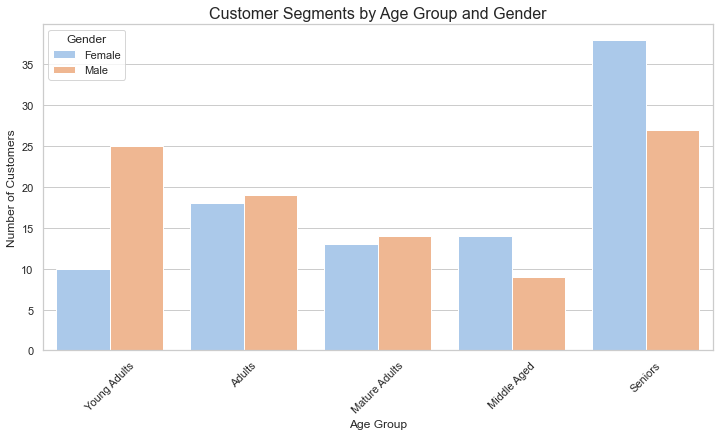

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





# Define paths to the data files
product_table_path = 'C:/Users/deshm/Desktop/dataml/Product_Table_.csv'
receipts_table_path = 'C:/Users/deshm/Desktop/dataml/Receipts_Table_.csv'
customer_table_path = 'C:/Users/deshm/Desktop/dataml/Customer_Table_.csv'



product_table = pd.read_csv(product_table_path)

sodas_item_codes_df = product_table[product_table['category_code'] == 'category_04']

sodas_item_codes = sodas_item_codes_df['item_code'].unique()

receipts_table = pd.read_csv(receipts_table_path)

receipts_table_of_sodas = receipts_table[receipts_table['item_code'].isin(sodas_item_codes)]


customer_table = pd.read_csv(customer_table_path)


customers_loving_sodas = pd.merge(receipts_table_of_sodas, customer_table, on='customer_code', how='inner')


age_bins = [18, 25, 35, 45, 55, 70]
age_labels = ['Young Adults', 'Adults', 'Mature Adults', 'Middle Aged', 'Seniors']
customers_loving_sodas['age_group'] = pd.cut(customers_loving_sodas['age'], bins=age_bins, labels=age_labels, right=False)


customer_segments = customers_loving_sodas.groupby(['age_group', 'gender']).size().reset_index(name='count')

sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='count', hue='gender', data=customer_segments, palette='pastel')

plt.title('Customer Segments by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender')


plt.show()


# Store Data Analysis

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



store_table_path = 'C:/Users/deshm/Desktop/dataml/Store_Table_.csv'  




store_table = pd.read_csv(store_table_path)


sodas_transactions_with_store = pd.merge(receipts_table_of_sodas, store_table, on='store_code', how='inner')

threshold_quantity = 5


sodas_store = sodas_transactions_with_store[sodas_transactions_with_store['quantity'] >= threshold_quantity]


sodas_store_segments = sodas_store.groupby('store_address').size().reset_index(name='count')




print(sodas_store_segments)


                  store_address  count
0          Bronx, New York City      5
1       Brooklyn, New York City     32
2      Manhattan, New York City     11
3         Queens, New York City     29
4  Staten Island, New York City     21


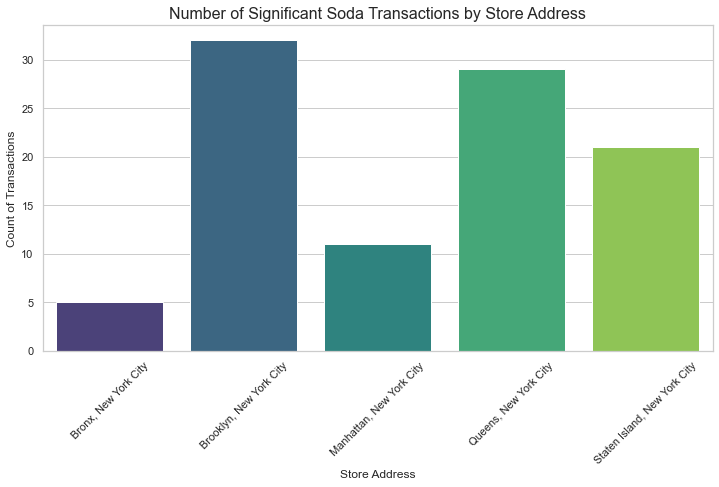

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.barplot(x='store_address', y='count', data=sodas_store_segments, palette='viridis')


plt.title('Number of Significant Soda Transactions by Store Address', fontsize=16)
plt.xlabel('Store Address', fontsize=12)
plt.ylabel('Count of Transactions', fontsize=12)
plt.xticks(rotation=45)


plt.show()


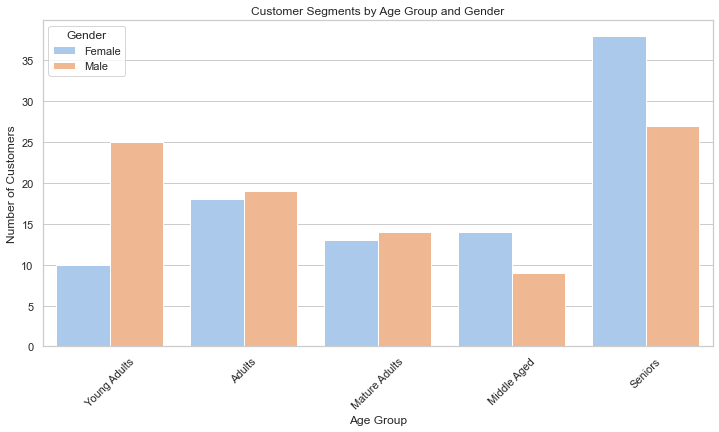

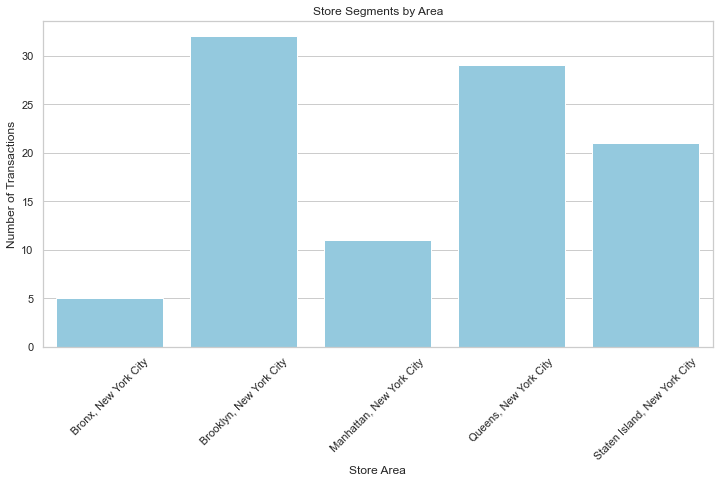

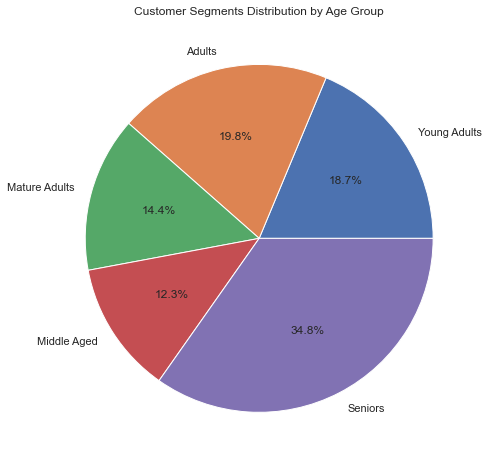

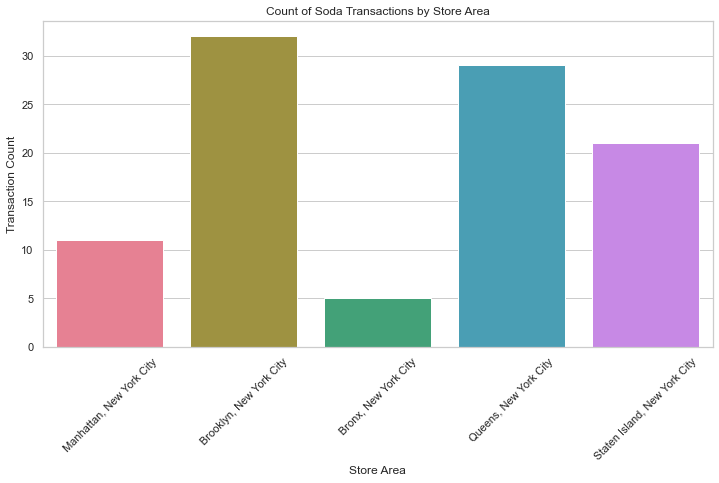

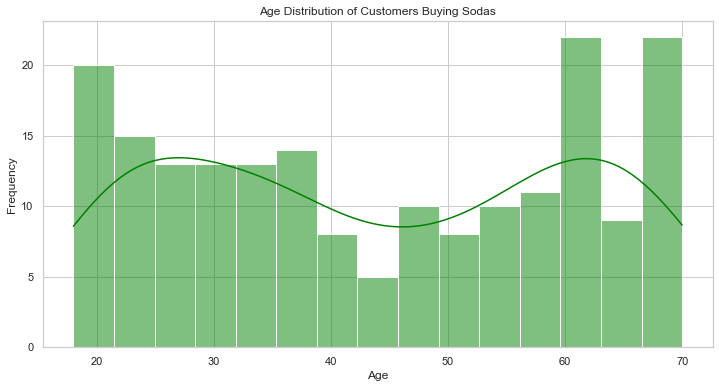

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

product_table_path = 'C:/Users/deshm/Desktop/dataml/Product_Table_.csv'
receipts_table_path = 'C:/Users/deshm/Desktop/dataml/Receipts_Table_.csv'
customer_table_path = 'C:/Users/deshm/Desktop/dataml/Customer_Table_.csv'
store_table_path = 'C:/Users/deshm/Desktop/dataml/Store_Table_.csv'  

product_table = pd.read_csv(product_table_path)

sodas_item_codes_df = product_table[product_table['category_code'] == 'category_04']

sodas_item_codes = sodas_item_codes_df['item_code'].unique()

receipts_table = pd.read_csv(receipts_table_path)

receipts_table_of_sodas = receipts_table[receipts_table['item_code'].isin(sodas_item_codes)]


customer_table = pd.read_csv(customer_table_path)
customers_loving_sodas = pd.merge(receipts_table_of_sodas, customer_table, on='customer_code', how='inner')


age_bins = [18, 25, 35, 45, 55, 70]
age_labels = ['Young Adults', 'Adults', 'Mature Adults', 'Middle Aged', 'Seniors']
customers_loving_sodas['age_group'] = pd.cut(customers_loving_sodas['age'], bins=age_bins, labels=age_labels, right=False)


customer_segments = customers_loving_sodas.groupby(['age_group', 'gender']).size().reset_index(name='count')

store_table = pd.read_csv(store_table_path)


sodas_transactions_with_store = pd.merge(receipts_table_of_sodas, store_table, on='store_code', how='inner')

threshold_quantity = 5


sodas_store = sodas_transactions_with_store[sodas_transactions_with_store['quantity'] >= threshold_quantity]

sodas_store_segments = sodas_store.groupby('store_address').size().reset_index(name='count')

sns.set(style="whitegrid")

# Customer Segments Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='count', hue='gender', data=customer_segments, palette='pastel')
plt.title('Customer Segments by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

# Store Segments Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='store_address', y='count', data=sodas_store_segments, color='skyblue')
plt.title('Store Segments by Area')
plt.xlabel('Store Area')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Customer Segments Pie Chart
plt.figure(figsize=(8, 8))
customer_segments.groupby('age_group')['count'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Segments Distribution by Age Group')
plt.ylabel('')
plt.show()

# Store Segments Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='store_address', data=sodas_store, palette='husl')
plt.title('Count of Soda Transactions by Store Area')
plt.xlabel('Store Area')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()

# Customer Age Distribution Histogram
plt.figure(figsize=(12, 6))
sns.histplot(customers_loving_sodas['age'], bins=15, kde=True, color='green')
plt.title('Age Distribution of Customers Buying Sodas')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
